In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
df_test = pd.read_csv('../Data/test.csv')

In [3]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratary Data Analysis

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df_test.shape

(1459, 80)

In [6]:
#dropping the 'Id' column
df_test = df_test.drop('Id', axis = 1)
df_test.shape

(1459, 79)

Showing the null elements

In [7]:
pd.set_option("display.max_columns", None, "display.max_rows", None)
df_test.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

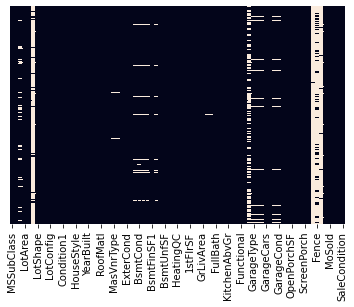

In [8]:
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False);

In [9]:
#before that we must drop the the features that have more than half missing features
#these are the columns where most of the data are missing
drop_columns = list(df_test.columns[df_test.isnull().sum() > len(df_test)/2])
drop_columns.remove('FireplaceQu')
drop_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
df_test = df_test.drop(drop_columns, axis = 1)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [11]:
# showing the colummns with missing data
missing_columns = df_test.columns[df_test.isnull().sum() != 0]
missing_columns

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [12]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [13]:
numeric_columns = df_test._get_numeric_data().columns
categorical_missing_columns = list(set(missing_columns) - set(numeric_columns))
categorical_missing_columns

['BsmtCond',
 'BsmtFinType1',
 'FireplaceQu',
 'GarageCond',
 'GarageQual',
 'MasVnrType',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageType',
 'Functional',
 'BsmtQual',
 'MSZoning',
 'KitchenQual',
 'GarageFinish',
 'Utilities',
 'SaleType',
 'Exterior2nd',
 'Exterior1st']

In [14]:
numeric_missing_columns = list(set(missing_columns) - set(categorical_missing_columns))
numeric_missing_columns

['BsmtUnfSF',
 'MasVnrArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 'BsmtFullBath',
 'LotFrontage',
 'BsmtFinSF1',
 'BsmtHalfBath',
 'GarageCars',
 'BsmtFinSF2',
 'GarageArea']

In [15]:
categorical_missing_columns_items = {}
for category in categorical_missing_columns:
    categorical_missing_columns_items[category] = len(df_test[category].value_counts())

categorical_missing_columns_items

{'BsmtCond': 4,
 'BsmtFinType1': 6,
 'FireplaceQu': 5,
 'GarageCond': 5,
 'GarageQual': 4,
 'MasVnrType': 4,
 'BsmtFinType2': 6,
 'BsmtExposure': 4,
 'GarageType': 6,
 'Functional': 7,
 'BsmtQual': 4,
 'MSZoning': 5,
 'KitchenQual': 4,
 'GarageFinish': 3,
 'Utilities': 1,
 'SaleType': 9,
 'Exterior2nd': 15,
 'Exterior1st': 13}

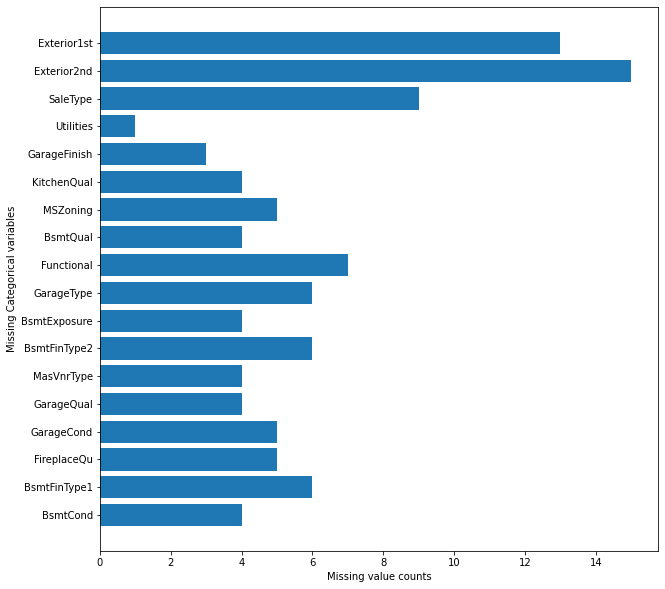

In [16]:
ax, fig = plt.subplots(1, 1, figsize = (10, 10))
plt.barh(range(len(categorical_missing_columns_items)), 
         categorical_missing_columns_items.values(),
         tick_label = [*categorical_missing_columns_items],
         align='center')
plt.ylabel("Missing Categorical variables")
plt.xlabel("Missing value counts")
plt.show()

In [17]:
categorical_missing_columns_items_train = {'Alley': 2,
 'Functional': 7,
 'RoofMatl': 8,
 'PavedDrive': 3,
 'LandContour': 4,
 'Exterior1st': 15,
 'PoolQC': 3,
 'SaleType': 9,
 'Electrical': 5,
 'MiscFeature': 4,
 'GarageFinish': 3,
 'BsmtExposure': 4,
 'CentralAir': 2,
 'BsmtCond': 4,
 'Fence': 4,
 'ExterQual': 4,
 'Condition1': 9,
 'FireplaceQu': 5,
 'GarageType': 6,
 'BldgType': 5,
 'LandSlope': 3,
 'HouseStyle': 8,
 'MSZoning': 5,
 'GarageQual': 5,
 'Street': 2,
 'BsmtQual': 4,
 'Neighborhood': 25,
 'KitchenQual': 4,
 'ExterCond': 5,
 'GarageCond': 5,
 'Utilities': 2,
 'BsmtFinType2': 6,
 'RoofStyle': 6,
 'MasVnrType': 4,
 'HeatingQC': 5,
 'LotConfig': 5,
 'LotShape': 4,
 'Exterior2nd': 16,
 'SaleCondition': 6,
 'Foundation': 6,
 'Condition2': 8,
 'Heating': 6,
 'BsmtFinType1': 6}

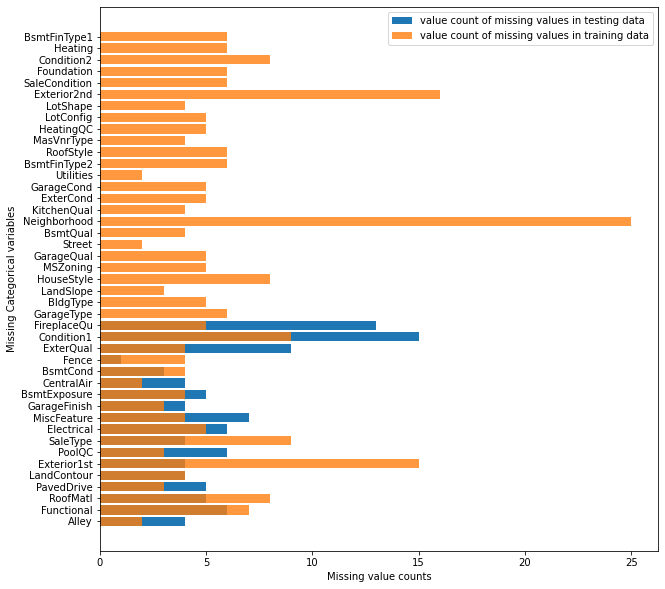

In [18]:
ax, fig = plt.subplots(1, 1, figsize = (10, 10))

plt.barh(range(len(categorical_missing_columns_items)), 
         categorical_missing_columns_items.values(),
         tick_label = [*categorical_missing_columns_items],
         align='center', label = "value count of missing values in testing data")

plt.barh(range(len(categorical_missing_columns_items_train)), 
         categorical_missing_columns_items_train.values(),
         tick_label = [*categorical_missing_columns_items_train],
         align='center', label = "value count of missing values in training data", alpha = 0.8)
plt.ylabel("Missing Categorical variables")
plt.xlabel("Missing value counts")
plt.legend()
plt.show()

The value counts in some of the feaures are different in the training and testing data so we need to add these features to the training data.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median"))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = "most_frequent"))
])

In [20]:
rest_of_columns = list(set(df_test.columns) - set(missing_columns))
rest_of_columns

['MiscVal',
 'MoSold',
 'SaleCondition',
 'OverallQual',
 'Condition2',
 'ExterCond',
 '3SsnPorch',
 'HalfBath',
 'OpenPorchSF',
 'HeatingQC',
 'Fireplaces',
 'ExterQual',
 'EnclosedPorch',
 'PoolArea',
 'MSSubClass',
 'BldgType',
 '2ndFlrSF',
 'Electrical',
 'Neighborhood',
 'RoofMatl',
 'HouseStyle',
 'Foundation',
 'YrSold',
 'LandContour',
 'LandSlope',
 'Heating',
 'LotConfig',
 'ScreenPorch',
 'YearRemodAdd',
 'BedroomAbvGr',
 'LotArea',
 'OverallCond',
 'KitchenAbvGr',
 'CentralAir',
 'LowQualFinSF',
 'TotRmsAbvGrd',
 'RoofStyle',
 'Street',
 'Condition1',
 'WoodDeckSF',
 'FullBath',
 'YearBuilt',
 '1stFlrSF',
 'GrLivArea',
 'LotShape',
 'PavedDrive']

In [21]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numeric_missing_columns),
    ("cat", cat_pipeline, categorical_missing_columns)
])

In [22]:
df_test_prepared_np = full_pipeline.fit_transform(df_test)

In [23]:
df_test_prepared_np

array([[270.0, 0.0, 1961.0, ..., 'WD', 'VinylSd', 'VinylSd'],
       [406.0, 108.0, 1958.0, ..., 'WD', 'Wd Sdng', 'Wd Sdng'],
       [137.0, 0.0, 1997.0, ..., 'WD', 'VinylSd', 'VinylSd'],
       ...,
       [0.0, 0.0, 1960.0, ..., 'WD', 'VinylSd', 'VinylSd'],
       [575.0, 0.0, 1979.0, ..., 'WD', 'Wd Shng', 'HdBoard'],
       [238.0, 94.0, 1993.0, ..., 'WD', 'HdBoard', 'HdBoard']],
      dtype=object)

In [24]:
df_test_prepared_np.shape

(1459, 29)

In [25]:
df_test.shape

(1459, 75)

In [26]:
columns = numeric_missing_columns + categorical_missing_columns
df_test_prepared = pd.DataFrame(df_test_prepared_np, columns = columns)
df_test_prepared.head()

,BsmtUnfSF,MasVnrArea,GarageYrBlt,TotalBsmtSF,BsmtFullBath,LotFrontage,BsmtFinSF1,BsmtHalfBath,GarageCars,BsmtFinSF2,GarageArea,BsmtCond,BsmtFinType1,FireplaceQu,GarageCond,GarageQual,MasVnrType,BsmtFinType2,BsmtExposure,GarageType,Functional,BsmtQual,MSZoning,KitchenQual,GarageFinish,Utilities,SaleType,Exterior2nd,Exterior1st
0,270,0,1961,882,0,80,468,0,1,144,730,TA,Rec,Gd,TA,TA,None,LwQ,No,Attchd,Typ,TA,RH,TA,Unf,AllPub,WD,VinylSd,VinylSd
1,406,108,1958,1329,0,81,923,0,1,0,312,TA,ALQ,Gd,TA,TA,BrkFace,Unf,No,Attchd,Typ,TA,RL,Gd,Unf,AllPub,WD,Wd Sdng,Wd Sdng
2,137,0,1997,928,0,74,791,0,2,0,482,TA,GLQ,TA,TA,TA,None,Unf,No,Attchd,Typ,Gd,RL,TA,Fin,AllPub,WD,VinylSd,VinylSd
3,324,20,1998,926,0,78,602,0,2,0,470,TA,GLQ,Gd,TA,TA,BrkFace,Unf,No,Attchd,Typ,TA,RL,Gd,Fin,AllPub,WD,VinylSd,VinylSd
4,1017,0,1992,1280,0,43,263,0,2,0,506,TA,ALQ,Gd,TA,TA,None,Unf,No,Attchd,Typ,Gd,RL,Gd,RFn,AllPub,WD,HdBoard,HdBoard


In [27]:
df_test_rest = df_test[rest_of_columns]
df_test_rest.head()

,MiscVal,MoSold,SaleCondition,OverallQual,Condition2,ExterCond,3SsnPorch,HalfBath,OpenPorchSF,HeatingQC,Fireplaces,ExterQual,EnclosedPorch,PoolArea,MSSubClass,BldgType,2ndFlrSF,Electrical,Neighborhood,RoofMatl,HouseStyle,Foundation,YrSold,LandContour,LandSlope,Heating,LotConfig,ScreenPorch,YearRemodAdd,BedroomAbvGr,LotArea,OverallCond,KitchenAbvGr,CentralAir,LowQualFinSF,TotRmsAbvGrd,RoofStyle,Street,Condition1,WoodDeckSF,FullBath,YearBuilt,1stFlrSF,GrLivArea,LotShape,PavedDrive
0,0,6,Normal,5,Norm,TA,0,0,0,TA,0,TA,0,0,20,1Fam,0,SBrkr,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Inside,120,1961,2,11622,6,1,Y,0,5,Gable,Pave,Feedr,140,1,1961,896,896,Reg,Y
1,12500,6,Normal,6,Norm,TA,0,1,36,TA,0,TA,0,0,20,1Fam,0,SBrkr,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Corner,0,1958,3,14267,6,1,Y,0,6,Hip,Pave,Norm,393,1,1958,1329,1329,IR1,Y
2,0,3,Normal,5,Norm,TA,0,1,34,Gd,1,TA,0,0,60,1Fam,701,SBrkr,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,13830,5,1,Y,0,6,Gable,Pave,Norm,212,2,1997,928,1629,IR1,Y
3,0,6,Normal,6,Norm,TA,0,1,36,Ex,1,TA,0,0,60,1Fam,678,SBrkr,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,9978,6,1,Y,0,7,Gable,Pave,Norm,360,2,1998,926,1604,IR1,Y
4,0,1,Normal,8,Norm,TA,0,0,82,Ex,0,Gd,0,0,120,TwnhsE,0,SBrkr,StoneBr,CompShg,1Story,PConc,2010,HLS,Gtl,GasA,Inside,144,1992,2,5005,5,1,Y,0,5,Gable,Pave,Norm,0,2,1992,1280,1280,IR1,Y


In [28]:
final_df_test_prepared = pd.concat([df_test_prepared, df_test_rest], axis=1)
final_df_test_prepared.head()

,BsmtUnfSF,MasVnrArea,GarageYrBlt,TotalBsmtSF,BsmtFullBath,LotFrontage,BsmtFinSF1,BsmtHalfBath,GarageCars,BsmtFinSF2,GarageArea,BsmtCond,BsmtFinType1,FireplaceQu,GarageCond,GarageQual,MasVnrType,BsmtFinType2,BsmtExposure,GarageType,Functional,BsmtQual,MSZoning,KitchenQual,GarageFinish,Utilities,SaleType,Exterior2nd,Exterior1st,MiscVal,MoSold,SaleCondition,OverallQual,Condition2,ExterCond,3SsnPorch,HalfBath,OpenPorchSF,HeatingQC,Fireplaces,ExterQual,EnclosedPorch,PoolArea,MSSubClass,BldgType,2ndFlrSF,Electrical,Neighborhood,RoofMatl,HouseStyle,Foundation,YrSold,LandContour,LandSlope,Heating,LotConfig,ScreenPorch,YearRemodAdd,BedroomAbvGr,LotArea,OverallCond,KitchenAbvGr,CentralAir,LowQualFinSF,TotRmsAbvGrd,RoofStyle,Street,Condition1,WoodDeckSF,FullBath,YearBuilt,1stFlrSF,GrLivArea,LotShape,PavedDrive
0,270,0,1961,882,0,80,468,0,1,144,730,TA,Rec,Gd,TA,TA,None,LwQ,No,Attchd,Typ,TA,RH,TA,Unf,AllPub,WD,VinylSd,VinylSd,0,6,Normal,5,Norm,TA,0,0,0,TA,0,TA,0,0,20,1Fam,0,SBrkr,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Inside,120,1961,2,11622,6,1,Y,0,5,Gable,Pave,Feedr,140,1,1961,896,896,Reg,Y
1,406,108,1958,1329,0,81,923,0,1,0,312,TA,ALQ,Gd,TA,TA,BrkFace,Unf,No,Attchd,Typ,TA,RL,Gd,Unf,AllPub,WD,Wd Sdng,Wd Sdng,12500,6,Normal,6,Norm,TA,0,1,36,TA,0,TA,0,0,20,1Fam,0,SBrkr,NAmes,CompShg,1Story,CBlock,2010,Lvl,Gtl,GasA,Corner,0,1958,3,14267,6,1,Y,0,6,Hip,Pave,Norm,393,1,1958,1329,1329,IR1,Y
2,137,0,1997,928,0,74,791,0,2,0,482,TA,GLQ,TA,TA,TA,None,Unf,No,Attchd,Typ,Gd,RL,TA,Fin,AllPub,WD,VinylSd,VinylSd,0,3,Normal,5,Norm,TA,0,1,34,Gd,1,TA,0,0,60,1Fam,701,SBrkr,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,13830,5,1,Y,0,6,Gable,Pave,Norm,212,2,1997,928,1629,IR1,Y
3,324,20,1998,926,0,78,602,0,2,0,470,TA,GLQ,Gd,TA,TA,BrkFace,Unf,No,Attchd,Typ,TA,RL,Gd,Fin,AllPub,WD,VinylSd,VinylSd,0,6,Normal,6,Norm,TA,0,1,36,Ex,1,TA,0,0,60,1Fam,678,SBrkr,Gilbert,CompShg,2Story,PConc,2010,Lvl,Gtl,GasA,Inside,0,1998,3,9978,6,1,Y,0,7,Gable,Pave,Norm,360,2,1998,926,1604,IR1,Y
4,1017,0,1992,1280,0,43,263,0,2,0,506,TA,ALQ,Gd,TA,TA,None,Unf,No,Attchd,Typ,Gd,RL,Gd,RFn,AllPub,WD,HdBoard,HdBoard,0,1,Normal,8,Norm,TA,0,0,82,Ex,0,Gd,0,0,120,TwnhsE,0,SBrkr,StoneBr,CompShg,1Story,PConc,2010,HLS,Gtl,GasA,Inside,144,1992,2,5005,5,1,Y,0,5,Gable,Pave,Norm,0,2,1992,1280,1280,IR1,Y
